# 오토인코더 구현
* **Numpy** : 행렬변환 및 계산 라이브러리
* **matplotlib** : 연산 결과를 가시화하기 위한 라이브러리
* **MNIST** : 숫자 손글씨 예제

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

W0725 16:48:33.629643 4481041856 deprecation.py:323] From <ipython-input-1-39cc6b0c866b>:6: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 16:48:33.630481 4481041856 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0725 16:48:33.631047 4481041856 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 하이퍼파라미터 옵션
* **learning_rate** : 최적화 함수에서 사용할 학습률
* **training_epoch** : 전체 데이터를 학습할 총횟수
* **batch_size** : 미니배치로 한 번에 학습할 데이터의 개수
* **n_hidden** : 은닉층의 뉴런 개수
* **n_input** : 입력값의 크기 (MNIST의 이미지 크기가 28 x 28 이므로 784 가 된다.)

In [2]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

## 입력값 플레이스홀더 설정
* 비지도 학습이므로 **출력값 플레이스 홀더가 없다.**

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

## 인코더, 디코더 구현
1. 우선 n_hidden(256)개의 뉴런을 가진 은닉층을 만든다.
2. 가중치와 편향 변수를 원하는 뉴런의 개수만큼 설정한다.
3. 변수들을 입력값과 곱하고 더한 뒤, 활성화 함수인 sigmoid 함수를 적용한다.

<br>

* **n_input 값보다 n_hidden 값이 더 작아서** 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아낸다.

In [4]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [5]:
# 디코더는 인코더의 반대로 입력값을 은닉층의 크기로 출력값을 입력층의 크기로 만들었다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

입력층(784) => 은닉층(256) => 출력층(784)

<br>

## 손실 함수 구현
* 가중치들을 최적화하기 위한 손실 함수 구현이 필요하다
* 압축된 은닉층의 뉴런들을 통해 입력값의 특징을 알아낼 수 있다.
* 입력값인 X를 평가하가 위한 실측값을 사용하고, 디코더가 내보낸 결괏값과의 차이를 손실값으로 설정한다. 그리고 이 값의 차이는 거리 함수로 구한다.

In [6]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

W0725 16:48:34.113107 4481041856 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 16:48:34.145692 4481041856 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 학습 진행

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})

        total_cost += cost_val
        
    print('Epoch: ', '%04d' %(epoch + 1),
         'Avg. cost = ', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch:  0001 Avg. cost =  0.2019
Epoch:  0002 Avg. cost =  0.0628
Epoch:  0003 Avg. cost =  0.0521
Epoch:  0004 Avg. cost =  0.0485
Epoch:  0005 Avg. cost =  0.0461
Epoch:  0006 Avg. cost =  0.0449
Epoch:  0007 Avg. cost =  0.0433
Epoch:  0008 Avg. cost =  0.0416
Epoch:  0009 Avg. cost =  0.0409
Epoch:  0010 Avg. cost =  0.0405
Epoch:  0011 Avg. cost =  0.0401
Epoch:  0012 Avg. cost =  0.0397
Epoch:  0013 Avg. cost =  0.0390
Epoch:  0014 Avg. cost =  0.0386
Epoch:  0015 Avg. cost =  0.0382
Epoch:  0016 Avg. cost =  0.0379
Epoch:  0017 Avg. cost =  0.0376
Epoch:  0018 Avg. cost =  0.0373
Epoch:  0019 Avg. cost =  0.0371
Epoch:  0020 Avg. cost =  0.0369
최적화 완료!


## 디코더 결과값 확인

In [8]:
# 먼저 총 10개의 테스트 데이터를 가져와 디코더를 이용해 출력값으로 만든다
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

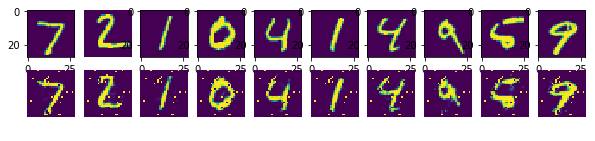

In [10]:
# numpy 모듈을 이용해 MNIST 데이터를 28 x 28 크기의 이미지 데이터로 재구성한 뒤,
# matplotlib의 imshow 함수를 이용해 그래프에 이미지로 출력한다.
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][1].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()